In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf 
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [3]:
from configuration_file import input_size, transfer_learning_input_size, output_category_number

In [15]:
from Model import feature_ext, classifier, final_model, define_compile_model, input_size, transfer_learning_input_size, output_category_number, batch_size, epochs

In [5]:
bs = 32
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [6]:
(train_images, train_labels),(validation_images, validation_labels) = tf.keras.datasets.cifar10.load_data()

In [7]:
from image_visualization import display_images, plt_metrics
from data_processing import preprocess_image

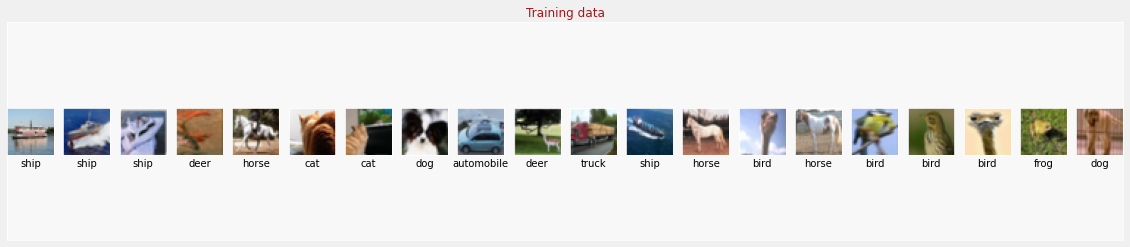

In [8]:
display_images(train_images, train_labels, train_labels, 'Training data', 20, classes)

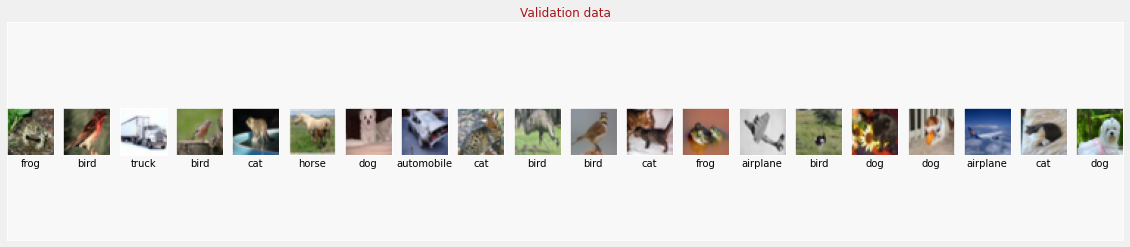

In [9]:
display_images(validation_images, validation_labels, validation_labels, 'Validation data', 20, classes)

In [10]:
train_X = preprocess_image(train_images)
val_X = preprocess_image(validation_images)


In [11]:
model = define_compile_model()

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [17]:
history = model.fit(train_X, train_labels, epochs = epochs, validation_data=(val_X, validation_labels), batch_size=batch_size)

Epoch 1/4
224/224 [==============================] - 5550s 25s/step - loss: 0.7264 - accuracy: 0.7760 - val_loss: 0.4494 - val_accuracy: 0.8507
Epoch 2/4
224/224 [==============================] - 5565s 25s/step - loss: 0.2131 - accuracy: 0.9294 - val_loss: 0.2398 - val_accuracy: 0.9179
Epoch 3/4
224/224 [==============================] - 5575s 25s/step - loss: 0.1160 - accuracy: 0.9638 - val_loss: 0.1951 - val_accuracy: 0.9332
Epoch 4/4
224/224 [==============================] - 5540s 25s/step - loss: 0.0636 - accuracy: 0.9828 - val_loss: 0.1995 - val_accuracy: 0.9366


In [ ]:
loss, accuracy = model.evaluate(val_X, validation_labels, batch_size=batch_size)

In [18]:
plot_metrics('accuracy', 'Accuracy', ylim=1)

NameError: name 'plot_metrics' is not defined

In [ ]:
probabilities = model.predict(val_X, batch_size=batch_size)
probabilities = np.argmax(probabilities, axis = 1)

display_images(validation_images, probabilities, validation_labels, "Bad predictions indicated in red.", 5, classes)

In [2]:
240/48

5.0